
# Disney. Какие фильмы надо снимать?

Мы фанаты фильмов Disney! Добрый человек собрал [данные](https://data.world/kgarrett/disney-character-success-00-16) по всем фильмам этой компании.  
Давайте поможем определить, какие жанры самые востребованные, чтобы они не прогадали, какой фильм производить следующим.

Булыгин Олег:  
* [LinkedIn](linkedin.com/in/obulygin)  
* [Мой канал в ТГ по Python](https://t.me/pythontalk_ru)
* [Чат канала](https://t.me/pythontalk_chat)
* [Блог в Телетайпе](https://teletype.in/@pythontalk)

In [78]:
import pandas as pd
import numpy as np
import seaborn as sns
import plotly.express as px
import matplotlib.pyplot as plt
import scipy.stats as stats

# подавляем scientific notation
# np.set_printoptions(formatter={'all':lambda x: str(x)})
# pd.set_option('display.float_format', lambda x: '%.2f' % x)

# увеличием размер визуализаций
sns.set(rc={'figure.figsize':(12,8)})

In [79]:
# читаем данные
movies_gross = pd.read_csv('https://raw.githubusercontent.com/obulygin/netology_pyda_files/main/disney_movies_total_gross.csv', parse_dates=['release_date'])
movies_gross

,movie_title,release_date,genre,mpaa_rating,total_gross,inflation_adjusted_gross
0,Snow White and the Seven Dwarfs,1937-12-21,Musical,G,184925485,5228953251
1,Pinocchio,1940-02-09,Adventure,G,84300000,2188229052
2,Fantasia,1940-11-13,Musical,G,83320000,2187090808
3,Song of the South,1946-11-12,Adventure,G,65000000,1078510579
4,Cinderella,1950-02-15,Drama,G,85000000,920608730
...,...,...,...,...,...,...
574,The Light Between Oceans,2016-09-02,Drama,PG-13,12545979,12545979
575,Queen of Katwe,2016-09-23,Drama,PG,8874389,8874389
576,Doctor Strange,2016-11-04,Adventure,PG-13,232532923,232532923
577,Moana,2016-11-23,Adventure,PG,246082029,246082029


In [80]:
movies_gross.isna().sum()

movie_title                  0
release_date                 0
genre                       17
mpaa_rating                 56
total_gross                  0
inflation_adjusted_gross     0
dtype: int64

In [81]:
movies_gross.duplicated().sum()

0

In [83]:
movies_gross.drop(movies_gross[movies_gross.genre.isna()].index, inplace= True)
movies_gross.isna().sum()

In [27]:
# movies_gross.genre.replace({'Musical':'_Musical'}, inplace= True);

In [28]:
# для начала просто посмотрим на жанры в топе. Вдруг все очевидно?
movies_gross.sort_values('inflation_adjusted_gross', ascending=False).head(10).style.bar()

# ваши выводы?

,movie_title,release_date,genre,mpaa_rating,total_gross,inflation_adjusted_gross
0,Snow White and the Seven Dwarfs,1937-12-21 00:00:00,Musical,G,184925485,5228953251
1,Pinocchio,1940-02-09 00:00:00,Adventure,G,84300000,2188229052
2,Fantasia,1940-11-13 00:00:00,Musical,G,83320000,2187090808
8,101 Dalmatians,1961-01-25 00:00:00,Comedy,G,153000000,1362870985
6,Lady and the Tramp,1955-06-22 00:00:00,Drama,G,93600000,1236035515
3,Song of the South,1946-11-12 00:00:00,Adventure,G,65000000,1078510579
564,Star Wars Ep. VII: The Force Awakens,2015-12-18 00:00:00,Adventure,PG-13,936662225,936662225
4,Cinderella,1950-02-15 00:00:00,Drama,G,85000000,920608730
13,The Jungle Book,1967-10-18 00:00:00,Musical,Not Rated,141843000,789612346
179,The Lion King,1994-06-15 00:00:00,Adventure,G,422780140,761640898


In [29]:
# а можеть есть какие-то тенденции по жанрам? 
# Посмотрим динамику по времени самым простым способом

# извлекаем год из даты выхода фильма
movies_gross['release_year'] = movies_gross.release_date.dt.year # dt.year -The year of the datetime.


# посчитаем средний доход в разрезе жанров и лет
gross_by_genres = movies_gross.groupby(['genre', 'release_year']).median().sort_values(by='inflation_adjusted_gross', ascending= False)

gross_by_genres

total_gross  inflation_adjusted_gross
genre       release_year                                       
Musical     1937          184925485.0              5.228953e+09
Adventure   1940           84300000.0              2.188229e+09
Musical     1940           83320000.0              2.187091e+09
Drama       1955           93600000.0              1.236036e+09
Adventure   1946           65000000.0              1.078511e+09
...                               ...                       ...
Documentary 2009            1391434.0              1.563976e+06
            2004             314000.0              4.262460e+05
            2008             275093.0              3.229790e+05
Drama       1981                  0.0              0.000000e+00
Action      1981                  0.0              0.000000e+00

[218 rows x 2 columns]

In [30]:
# genres 
len(set(movies_gross.genre)),set(movies_gross.genre)

(12,
 {'Action',
  'Adventure',
  'Black Comedy',
  'Comedy',
  'Concert/Performance',
  'Documentary',
  'Drama',
  'Horror',
  'Musical',
  'Romantic Comedy',
  'Thriller/Suspense',
  'Western'})

In [31]:
# отсортируем по убыванию дохода
gross_by_genres = gross_by_genres.reset_index().sort_values('inflation_adjusted_gross', ascending=False)

In [32]:
gross_by_genres.head(10).style.bar(align='left') # .iloc[:,1:]

,genre,release_year,total_gross,inflation_adjusted_gross
0,Musical,1937,184925485.000000,5228953251.000000
1,Adventure,1940,84300000.000000,2188229052.000000
2,Musical,1940,83320000.000000,2187090808.000000
3,Drama,1955,93600000.000000,1236035515.000000
4,Adventure,1946,65000000.000000,1078510579.000000
5,Drama,1950,85000000.000000,920608730.000000
6,Comedy,1961,89190703.500000,836482779.500000
7,Musical,1967,141843000.000000,789612346.000000
8,Action,2012,623279547.000000,660081224.000000
9,Adventure,1954,28200000.000000,528279994.000000


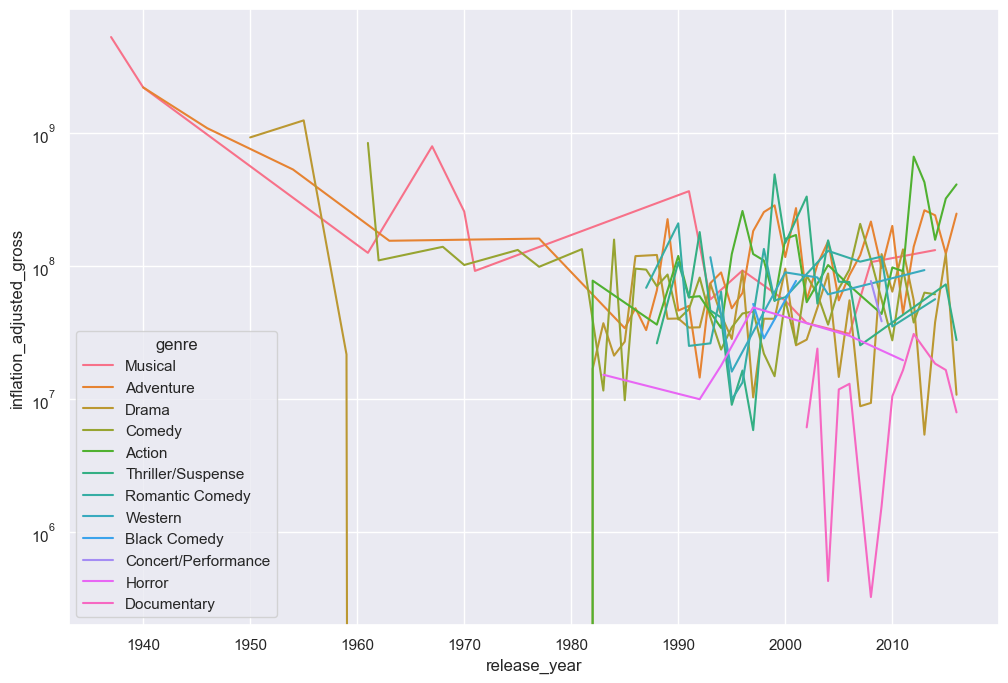

In [33]:
# визуализируем. выводы?

fig = sns.lineplot(x='release_year', 
            y='inflation_adjusted_gross',  
            hue='genre', 
            data=gross_by_genres)
plt.yscale('log')

In [34]:
fig = px.line(gross_by_genres.sort_values('release_year'), x='release_year', y='inflation_adjusted_gross', color='genre', log_y= True)
# fig.update_yaxes(range=[-0.1, 10])
fig.show()

In [37]:
# movies_gross.groupby("genre").inflation_adjusted_gross.mean().sort_values(ascending= False)

Построим линейную регрессию, чтобы определить как зависит доходность фильма от жанра.

Намм необходимо преобразовать нечисловые признаки (для этого будем использовать кодировшик [**OneHotEncoder**](https://habr.com/ru/company/ods/blog/326418/#rabota-s-kategorialnymi-priznakami-label-encoding-one-hot-encoding-hashing-trick)) в числовой вид, иначе мы не сможем применять LR (алгоритмы работаю только с числами). Как думаете, почему надо именно OHE?

In [ ]:
movies_gross_to_dummies2 = 

In [45]:
# movies_gross_to_dummies = pd.get_dummies(data=movies_gross, columns= ['genre'], prefix= None)
movies_gross_to_dummies = pd.get_dummies(data=movies_gross['genre'])
movies_gross_to_dummies.head()

,Action,Adventure,Black Comedy,Comedy,Concert/Performance,Documentary,Drama,Horror,Musical,Romantic Comedy,Thriller/Suspense,Western
0,0,0,0,0,0,0,0,0,1,0,0,0
1,0,1,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,1,0,0,0
3,0,1,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,1,0,0,0,0,0


In [46]:
# строим модель линейной регрессии
from sklearn.linear_model import LinearRegression

lr = LinearRegression()  
lr.fit(movies_gross_to_dummies, movies_gross['inflation_adjusted_gross'])

baseline = lr.intercept_
coefs = lr.coef_

print(baseline)
inter = pd.DataFrame(zip(movies_gross_to_dummies.columns, coefs))
inter


9.949444670281312e+22


,0,1
0,Action,-9.949445e+22
1,Adventure,-9.949445e+22
2,Black Comedy,-9.949445e+22
3,Comedy,-9.949445e+22
4,Concert/Performance,-9.949445e+22
5,Documentary,-9.949445e+22
6,Drama,-9.949445e+22
7,Horror,-9.949445e+22
8,Musical,-9.949445e+22
9,Romantic Comedy,-9.949445e+22


In [47]:
print(f'Number of columns: {inter.shape[0]}')

Number of columns: 12


In [48]:
# Давайте проинтепретируем результаты. 
# проблема мультиколлинеарности: https://towardsdatascience.com/one-hot-encoding-multicollinearity-and-the-dummy-variable-trap-b5840be3c41a
# , drop_first=True) !!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!

In [50]:
# а теперь за intercept берем один из жанров 
# проблема мультиколлинеарности: https://towardsdatascience.com/one-hot-encoding-multicollinearity-and-the-dummy-variable-trap-b5840be3c41a
movies_gross_to_dummies = pd.get_dummies(data= movies_gross['genre'], drop_first=True)

lr = LinearRegression()  

lr.fit(movies_gross_to_dummies, movies_gross['inflation_adjusted_gross'])

action = lr.intercept_
coefs = lr.coef_

print(action)
inter = pd.DataFrame(zip(movies_gross_to_dummies.columns, coefs))
inter.style.bar()

137473419.64999974


,0,1
0,Adventure,52923992.427520
1,Black Comedy,-85229927.983333
2,Comedy,-52805689.358791
3,Concert/Performance,-80062580.650000
4,Documentary,-124755393.524999
5,Drama,-65580397.860526
6,Horror,-114059570.983333
7,Musical,466124441.350001
8,Romantic Comedy,-59696335.606522
9,Thriller/Suspense,-47819629.900000


In [51]:
print(f'Number of columns: {inter.shape[0]}')

Number of columns: 11


In [53]:
# рассчитываем бутстрэповский доверительный интервал
coef_df = pd.DataFrame()

# берем много выборок из жанра+доход
action = []


for i in range(1000):

    # sampling
    genres_by_gross =  movies_gross[['genre', 'inflation_adjusted_gross']].sample(frac=1, replace=True)

    # encode categorical features
    dummies = pd.get_dummies(data=genres_by_gross['genre'], drop_first=True) # drop_first отбросит первый признак (жанр), в нашем случае это Action
    
    # Fit linear model  (    Training data,   Target values )
    lr = LinearRegression().fit(dummies, genres_by_gross['inflation_adjusted_gross'])

    # lr result output -> zip (dummies.columns, lr.coef_)
    coefs = pd.DataFrame(zip(dummies.columns, lr.coef_))

    # concat results on rows axis (long table)
    coef_df = pd.concat([coef_df, coefs])

    # save  intercept to action list
    action.append(lr.intercept_)

    if len(set(dummies.columns)) < 10:        
        print(f'Rare case * only {len(set(coefs[0]))}  features in a sample {genres_by_gross.shape}')


Rare case * only 9  features in a sample (562, 2)
Rare case * only 9  features in a sample (562, 2)
Rare case * only 9  features in a sample (562, 2)
Rare case * only 9  features in a sample (562, 2)
Rare case * only 9  features in a sample (562, 2)
Rare case * only 9  features in a sample (562, 2)


In [55]:
coef_df.columns = ['genre', 'coef']
coef_df

,genre,coef
0,Adventure,7.174091e+07
1,Black Comedy,-8.260988e+07
2,Comedy,-2.550589e+07
3,Concert/Performance,-6.132064e+07
4,Documentary,-1.064498e+08
...,...,...
6,Horror,-1.319316e+08
7,Musical,1.209641e+08
8,Romantic Comedy,-8.895412e+07
9,Thriller/Suspense,-6.127165e+07


In [56]:
# смотрим коэффициенты для всех жанров
coef_df.set_index('genre')

,coef
genre,
Adventure,7.174091e+07
Black Comedy,-8.260988e+07
Comedy,-2.550589e+07
Concert/Performance,-6.132064e+07
Documentary,-1.064498e+08
...,...
Horror,-1.319316e+08
Musical,1.209641e+08
Romantic Comedy,-8.895412e+07


In [57]:
# смотрим intercept (Action)
# it's a base (reper point)

action[0:5]

[118731482.31707314,
 176461283.00000006,
 105571878.11764699,
 117617752.56756756,
 112595800.14583321]

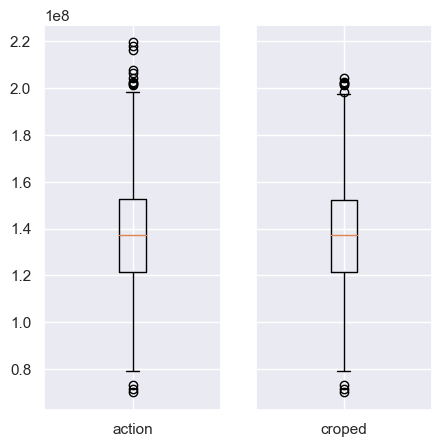

In [65]:
mask = pd.Series(action)[np.abs(stats.zscore(pd.Series(action)) ) > 3].index
dif_croped = pd.Series(action).drop(index = mask) 

fig, axes = plt.subplots(1,2, sharey= True, figsize= (5,5))
axes[0].boxplot(pd.Series(action),  labels= ("action",)) #notch= True - no meaning to use here as  notch is calculated using inner bootstrap over already bootstraped data 
axes[1].boxplot(pd.Series(dif_croped), labels= ("croped",))
# axes[1]=pd.Series(action).plot(kind='kde',  c= 'r', alpha= 0.3 )
plt.show()

In [66]:
# считаем доверительный интервал для intercept (Action)
confidence_interval_action = pd.Series(dif_croped).quantile([0.025, 0.975])
confidence_interval_action
# выводы?

0.025    9.279138e+07
0.975    1.808356e+08
dtype: float64

In [67]:
confidence_interval_action = pd.Series(action).quantile([0.025, 0.975])
confidence_interval_action

0.025    9.281114e+07
0.975    1.832125e+08
dtype: float64

In [ ]:
# bootstrap_ci = stats.bootstrap((pd.Series(action),), np.mean, confidence_level=0.95)
# bootstrap_ci

# this bootstrap over previousle boostraped data !!!!!!!!!!

In [72]:
# считаем доверительный интервал для коэффициента Adventure
confidence_interval_adv = coef_df.query('genre == "Adventure"').coef.quantile([0.025, 0.975])
confidence_interval_adv
# выводы?

0.025   -5.483452e+06
0.975    1.191307e+08
Name: coef, dtype: float64

In [75]:
stats.shapiro(pd.Series(action))

ShapiroResult(statistic=0.9960558414459229, pvalue=0.012012152932584286)

CI using `stats.norm.interval()`

In [74]:
stats.norm.interval(confidence= 0.95, loc= pd.Series(action).mean(), scale= np.std(pd.Series(action)) )

(92389115.87097567, 182488220.11155528)

In [73]:
stats.norm.interval(confidence= 0.95, loc= coef_df.query('genre == "Adventure"').coef.mean(), scale= np.std(coef_df.query('genre == "Adventure"').coef) )

(-9758035.412537403, 117294144.34438363)

In [76]:
coef_df2 = pd.DataFrame(columns=['genre', 'median', 'quant_3%', 'quant_97%'])#, 'scipy_3%', 'scipy_97%',] )
scale = 1e6

lower= pd.Series(action).quantile([0.025,]).iloc[0] / scale
upper= pd.Series(action).quantile([0.975,]).iloc[0] / scale
action_mean = (lower + upper)  / 2
for gg in set(gross_by_genres.genre):

    if gg != 'Action':
        lower= coef_df.query(f'genre == "{gg}"').coef.quantile([0.025]).iloc[0] / scale + action_mean
        upper= coef_df.query(f'genre == "{gg}"').coef.quantile([0.975]).iloc[0] / scale + action_mean
        # mean = (lower + upper)  / 2
        median= coef_df.query(f'genre == "{gg}"').coef.quantile([0.5]).iloc[0] / scale + action_mean
        coef_df2.loc[len(coef_df2.index)] = [gg, median, lower, upper ]
    else:
        lower= pd.Series(action).quantile([0.025,]).iloc[0] / scale
        upper= pd.Series(action).quantile([0.975,]).iloc[0] / scale
        median= pd.Series(action).quantile([0.5,]).iloc[0] / scale  
        # mean = (lower + upper)  / 2
        coef_df2.loc[len(coef_df2.index)] = [gg, median, lower, upper ]

coef_df2 = coef_df2.round().sort_values(by='median', ascending= False)

In [77]:
# pd.options.display.precision =2
coef_df2.style.bar()

,genre,median,quant_3%,quant_97%
6,Musical,550.000000,114.000000,1384.000000
8,Adventure,191.000000,133.000000,257.000000
1,Action,137.000000,93.000000,183.000000
9,Thriller/Suspense,90.000000,22.000000,157.000000
11,Comedy,85.000000,36.000000,135.000000
4,Romantic Comedy,78.000000,24.000000,133.000000
7,Western,75.000000,16.000000,124.000000
5,Drama,72.000000,19.000000,124.000000
3,Concert/Performance,59.000000,1.000000,110.000000
10,Black Comedy,53.000000,-3.000000,106.000000


In [ ]:
# pd.describe_option('display.precision')